# cell-cell communication inference

In this tutorial, we demonstrate the cell cell interaction based on ligand-receptor products conditioned on spatial proximity between clusters. This is done in the following three steps.

1. Find spatially adjacent clusters(celltypes);
2. Given two celltypes, find space-specific ligand-receptor pairs.
3. (Optional),Loop executes multiple two-cell type interactions.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spateo as st

## Load data

We will be using a axolotl dataset from [Wei et al., 2022] (https://doi.org/10.1126/science.abp9444).

Here, we can get data directly from the function`st.sample.axolotl` or link: 

1. axolotl_2DPI: https://www.dropbox.com/s/6ihasky6mey286l/axolotl_2DPI.h5ad?dl=1

2. axolotl_2DPI_right: https://www.dropbox.com/s/pm5vvqcd4leahsb/axolotl_2DPI_right.h5ad?dl=1

In [2]:
adata = st.sample_data.axolotl(filename='axolotl_2DPI.h5ad')
adata

AnnData object with n_obs × n_vars = 7668 × 27324
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
    var: 'Axolotl_ID', 'hs_gene'
    uns: 'Annotation_colors', 'Injury_2DPI_rep1_SS200000147BL_D5', '__type', 'angle_dict', 'color_key', 'neighbors', 'pp', 'umap_fit'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'pearson_residuals', 'spatial'
    varm: 'PCs'
    layers: 'counts', 'log1p'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

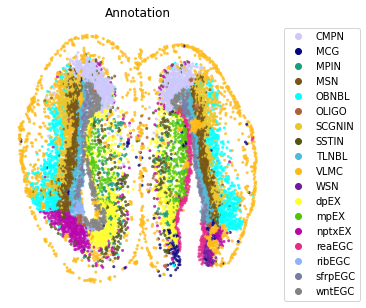

In [3]:
st.pl.space(adata,
            color=['Annotation'],
            pointsize=0.2,
            color_key=adata.uns['color_key'],
            show_legend='upper left',
            figsize=(5, 5))

## Find spatially adjacent celltypes

First, we calculate the weighted spatial graph between celltypes, which the nearest neighbor of a cell are based on the `fixed-neighbor` or `fixed-radius` methods. The spatial graphs and spatial distances are saves to `adata.obsp['spatial_distances']`,`adata.obsp['spatial_weights']`,`adata.obsp['spatial_connectivities']` ,`adata.uns['spatial_neighbors']`.

In [4]:
weights_graph, distance_graph, adata = st.tl.weighted_spatial_graph(
    adata,
    n_neighbors=10,
    fixed='n_neighbors',
)

|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.
|-----> <insert> spatial_weights to obsp in AnnData Object.


|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.
|-----> <insert> spatial_weights to obsp in AnnData Object.
|-----> 
--- 18 labels, 7668 samples ---
initalized (19,) index ptr: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
initalized (7668,) indices: [0 0 0 ... 0 0 0]
initalized (7668,) data: [1 1 1 ... 1 1 1]

|-----> Deep copying AnnData object and working on the new copy. Original AnnData object will not be modified.
|-----> Matrix multiplying labels x weights x labels-transpose, shape (18, 7668) x (7668, 7668) x (7668, 18).


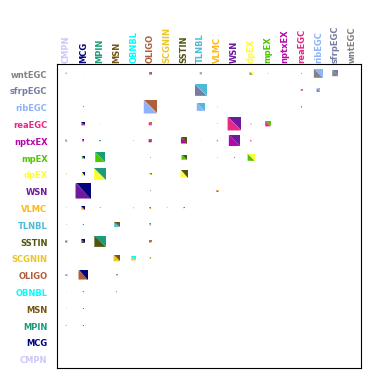

In [5]:
st.pl.plot_connections(
    adata,
    cat_key='Annotation',
    save_show_or_return='show',
    title_str=" ",
    title_fontsize=6,
    label_fontsize=6,
    colormap=adata.uns['color_key'],
    figsize=(4, 4),
)

## Given two celltypes, find space-specific ligand-receptor pairs.

Based on the result above, here we take the `reaEGC`(sender celltype) and `WSN`(receiver celltype) as an example.

In [ ]:
adata = st.sample_data.axolotl(filename='axolotl_2DPI_right.h5ad')
adata

AnnData object with n_obs × n_vars = 3625 × 27324
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
    var: 'Axolotl_ID', 'hs_gene'
    uns: 'Annotation_colors', '__type', 'color_key'
    obsm: 'X_pca', 'X_spatial', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [7]:
sender_ct = 'reaEGC'
receptor_ct = 'WSN'

`plot all cell pair`

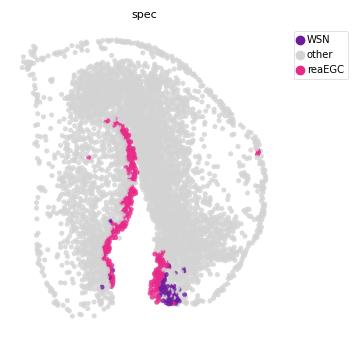

In [8]:
st.tl.prepare_cci_cellpair_adata(adata, sender_group=sender_ct,
                                 receiver_group=receptor_ct, group='Annotation', all_cell_pair=True)
# plot all cell pair
st.pl.space(adata,
            color=['spec'],
            pointsize=0.2,
            color_key={'other': '#D3D3D3', sender_ct: adata.uns['color_key']
                       [sender_ct], receptor_ct: adata.uns['color_key'][receptor_ct]},
            show_legend='upper left',
            figsize=(4, 4),
            save_show_or_return='show',
            #save_kwargs={"prefix": "./figures/left_2DPI_uninjury_cci_" + sender_ct + "_" + receptor_ct + "_all_cell_pair"}
            )

`st.tl.find_cci_two_group`

In [9]:
weights_graph, distance_graph, adata = st.tl.weighted_spatial_graph(
    adata,
    n_neighbors=10,
)

|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.
|-----> <insert> spatial_weights to obsp in AnnData Object.


In [10]:
res = st.tl.find_cci_two_group(adata,
                               path='/DATA/User/zuolulu/spateo-release/spateo/tools/database/',
                               species='axolotl',
                               group='Annotation',
                               sender_group=sender_ct,
                               receiver_group=receptor_ct,
                               filter_lr='outer',
                               min_pairs=0,
                               min_pairs_ratio=0,
                               top=20,)

|-----> 20 ligands for cell type reaEGC with highest fraction of prevalence: ['AMEX60DD008914', 'AMEX60DD001392', 'AMEX60DD049490', 'AMEX60DD051636', 'AMEX60DD041932', 'AMEX60DD008951', 'AMEX60DD028699', 'AMEX60DD034565', 'AMEX60DD049502', 'AMEX60DD001946', 'AMEX60DD013396', 'AMEX60DD055544', 'AMEX60DD003208', 'AMEX60DD014882', 'AMEX60DD005285', 'AMEX60DD043190', 'AMEX60DD040292', 'AMEX60DD012285', 'AMEX60DD001694', 'AMEX60DD017034']. Testing interactions involving these genes.
|-----> 20 receptors for cell type WSN with highest fraction of prevalence: ['AMEX60DD000016', 'AMEX60DD055551', 'AMEX60DD049635', 'AMEX60DD018191', 'AMEX60DDU001007023', 'AMEX60DD041858', 'AMEX60DD051542', 'AMEX60DD029326', 'AMEX60DD029929', 'AMEX60DD055467', 'AMEX60DD014152', 'AMEX60DD027855', 'AMEX60DD055776', 'AMEX60DD033101', 'AMEX60DD051881', 'AMEX60DD042067', 'AMEX60DD029894', 'AMEX60DDU001005617', 'AMEX60DD009754', 'AMEX60DD008017']. Testing interactions involving these genes.


100%|██████████| 1000/1000 [00:08<00:00, 124.60it/s]


`plot spatial neighbors cell pair`

(None, [<AxesSubplot:title={'center':'spec'}>])

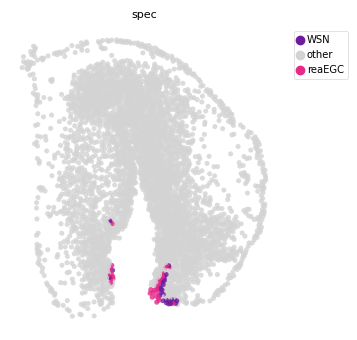

In [11]:
st.tl.prepare_cci_cellpair_adata(
    adata, sender_group=sender_ct, receiver_group=receptor_ct, cci_dict=res, all_cell_pair=False)
# plot
st.pl.space(adata,
            color=['spec'],
            pointsize=0.2,
            color_key={'other': '#D3D3D3', sender_ct: adata.uns['color_key']
                       [sender_ct], receptor_ct: adata.uns['color_key'][receptor_ct]},
            show_legend='upper left',
            figsize=(4, 4),
            save_show_or_return='return',
            #save_kwargs={"prefix": "./figures/left_2DPI_uninjury_cci_" + sender_ct + "_" + receptor_ct + "_cell_pair"}
            )

`plot heatmap : significant ligand-receptor pairs`

From `st.tl.find_cci_two_group`, we can get significant LR pairs specific to sender and receiver celltypes, `res['lr_pair']`, with columns are `lr_co_exp_num`, the number of cell-pairs co-expressed liagnd(expressed in sender cell type) and receptor(expressed in receiver cell type). `lr_co_exp_ratio`,Co-expressed cell-pairs account for all the paired cells.`lr_co_exp_ratio_pvalue`,p value of the LR pairs from permutation test, `lr_co_exp_ratio_qvalue`,FDR value. Here we use heatmap to show the LR pairs.

In [12]:
df = res['lr_pair']
df = df.loc[df['lr_co_exp_num'] > 0].sort_values(
    'lr_co_exp_ratio', ascending=False)[0:10]

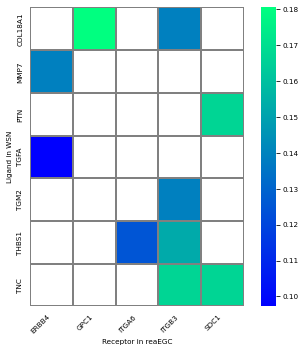

In [13]:
%matplotlib inline
data1 = df.iloc[:, [2, 3, 7]]
test = data1.pivot(index="human_ligand", columns="human_receptor",
                   values="lr_co_exp_ratio").fillna(0)
fig = plt.figure()
fig.set_size_inches(5, 5)
x_label = list(test.columns.tolist())
y_label = list(test.index)
ax = sns.heatmap(test,
                 cmap="winter",
                 square=True,
                 yticklabels=y_label,
                 linecolor='grey',
                 linewidths=0.3,
                 annot_kws={'size': 10, 'weight': 'bold', },
                 xticklabels=x_label,
                 mask=(test < 0.01))
plt.gcf().subplots_adjust(bottom=0.3)
plt.xlabel("Receptor in reaEGC")
plt.ylabel("Ligand in WSN")
ax.set_xticklabels(x_label, rotation=45, ha="right")
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
plt.tight_layout()
#plt.savefig("./figures/2DPI_sub_cci_WSN_ReaEGC_heatmap.pdf", transparent=True)

## (Optional) Loop executes multiple two-cell type interactions.

In the case of multiple cell types interacting in a region, the following code can be run. Here we choose the reigon of injury of 2DPI datasets of axolotl. In this microenvironment, these types of cells(`reaEGC`,`MCG`,`WSN`, `nptxEX`) may interact and cause regeneration to occur. 

In [14]:
a = ['reaEGC', 'MCG', 'WSN', 'nptxEX']

First, construct the celltype pairs in this reigion.

In [15]:
df = pd.DataFrame({
    "celltype_sender": np.repeat(a, len(a)),
    "celltype_receiver": list(a)*len(a),
})
df = df[df['celltype_sender'] != df['celltype_receiver']]
df["celltype_pair"] = df["celltype_sender"].str.cat(
    df["celltype_receiver"], sep="-")
df

,celltype_sender,celltype_receiver,celltype_pair
1,reaEGC,MCG,reaEGC-MCG
2,reaEGC,WSN,reaEGC-WSN
3,reaEGC,nptxEX,reaEGC-nptxEX
4,MCG,reaEGC,MCG-reaEGC
6,MCG,WSN,MCG-WSN
7,MCG,nptxEX,MCG-nptxEX
8,WSN,reaEGC,WSN-reaEGC
9,WSN,MCG,WSN-MCG
11,WSN,nptxEX,WSN-nptxEX
12,nptxEX,reaEGC,nptxEX-reaEGC


Second, calculate the cell pairs and ligand-receptor pairs which interact significantly.

In [ ]:
res = {}
for i in df['celltype_pair']:
    s, r = i.split(sep='-')
    res[i] = st.tl.find_cci_two_group(adata,
                                      path='/DATA/User/zuolulu/spateo-release/spateo/tools/database/',
                                      species='axolotl',
                                      group='Annotation',
                                      sender_group=s,
                                      receiver_group=r,
                                      filter_lr='outer',
                                      min_pairs=0,
                                      min_pairs_ratio=0,
                                      top=20,)
result = pd.DataFrame(columns=res[df['celltype_pair'][1]]['lr_pair'].columns)
for l in df.index:
    res[df['celltype_pair'][l]]['lr_pair'] = res[df['celltype_pair'][l]
                                                 ]['lr_pair'].sort_values('lr_co_exp_ratio', ascending=False)[0:3]
    result = pd.concat([result, res[df['celltype_pair'][l]]
                       ['lr_pair']], axis=0, join='outer')

df_result = result.loc[result['lr_co_exp_num'] > 5]
df_result.drop_duplicates(
    subset=['lr_pair', 'sr_pair', ], keep='first', inplace=True)

In [ ]:
df_result

,from,to,human_ligand,human_receptor,lr_pair,lr_product,lr_co_exp_num,lr_co_exp_ratio,lr_co_exp_ratio_pvalue,is_significant,lr_co_exp_ratio_qvalues,is_significant_fdr,sr_pair
732,AMEX60DD050822,AMEX60DD033101,TNC,SDC1,TNC-SDC1,0.279845,6,0.222222,0.0,True,0.0,True,reaEGC-WSN
1388,AMEX60DD007022,AMEX60DD033101,PTN,SDC1,PTN-SDC1,0.219582,6,0.222222,0.0,True,0.0,True,reaEGC-WSN
2383,AMEX60DD025587,AMEX60DD029929,L1CAM,ERBB3,L1CAM-ERBB3,0.228899,7,0.250000,0.0,True,0.0,True,WSN-reaEGC
598,AMEX60DD004094,AMEX60DD024484,ADAM10,AXL,ADAM10-AXL,0.270375,7,0.250000,0.0,True,0.0,True,WSN-reaEGC
1204,AMEX60DD031350,AMEX60DD029261,NPTX1,NPTXR,NPTX1-NPTXR,1.881333,19,0.558824,0.0,True,0.0,True,nptxEX-WSN
